In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

import seaborn as sb
rcParams['figure.figsize'] = 10, 8

In [2]:
data = pd.read_csv('C:/Hari Docs/Code/Financial Distress.csv')
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [47]:
#Target = Financial Distress
#Predictor = x1 to x83
data.iloc[:,0:3].describe()

,Company,Time,Financial Distress
count,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257
std,117.024636,4.064016,2.652227
min,1.000000,1.000000,-8.631700
25%,80.000000,4.000000,0.172275
50%,168.000000,7.000000,0.583805
75%,264.250000,11.000000,1.351750
max,422.000000,14.000000,128.400000


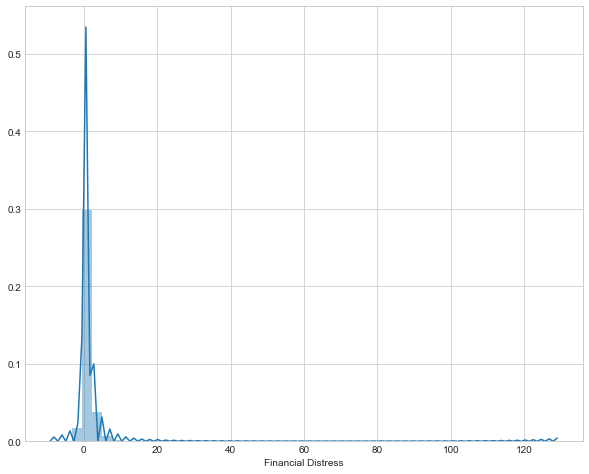

In [3]:
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')
sb.distplot(data['Financial Distress'])

In [4]:
#print Skewness and kurtosis
print("Skewness: %f" %data['Financial Distress'].skew())
print("Kurtosis: %f" %data['Financial Distress'].kurt())

Skewness: 30.873600
Kurtosis: 1451.206671


In [77]:
fqy = data.groupby(['Financial Distress' ]) 
fqy.size()

TypeError: '>' not supported between instances of 'list' and 'float'

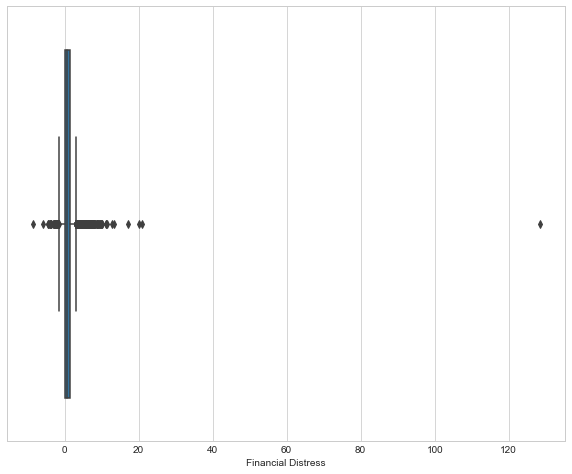

In [68]:
sb.boxplot(data['Financial Distress'])

In [5]:
df1 = data[['Company', 'Time', 'Financial Distress']]
df1.head()

,Company,Time,Financial Distress
0,1,1,0.010636
1,1,2,-0.455970
2,1,3,-0.325390
3,1,4,-0.566570
4,2,1,1.357300


In [15]:
#Number of companies distressed and healthy
print (df1[df1.iloc[:,2] > -0.5].count())
print(df1[df1.iloc[:,2] <= -0.5].count())

Company               3536
Time                  3536
Financial Distress    3536
dtype: int64
Company               136
Time                  136
Financial Distress    136
dtype: int64


In [6]:
#Extract distressed companies 
df2 = df1[df1.iloc[:,2] <= -0.5]
df2.describe()

,Company,Time,Financial Distress
count,136.000000,136.000000,136.000000
mean,180.588235,6.933824,-1.410059
std,120.458105,4.091911,1.153409
min,1.000000,1.000000,-8.631700
25%,83.750000,3.000000,-1.700550
50%,159.500000,7.000000,-0.992225
75%,290.500000,10.000000,-0.686120
max,420.000000,14.000000,-0.500680


In [7]:
df2['Time'].value_counts()

2     17
7     16
9     13
3     12
14    11
1     10
8      9
6      9
13     8
4      8
12     6
11     6
5      6
10     5
Name: Time, dtype: int64

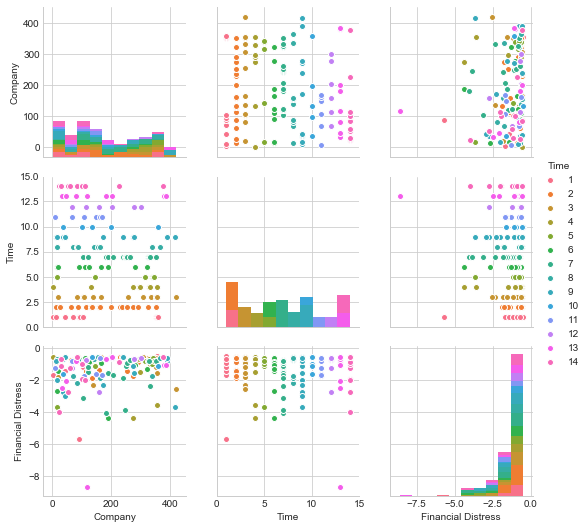

In [11]:
sb.pairplot(df2, hue = 'Time')


In [21]:
data['Fin_Health'] = np.where(data['Financial Distress'] > -0.5, 1, 0)
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,Fin_Health
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49,1
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50,1
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51,1
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52,0
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27,1


In [22]:
data['Fin_Health'].value_counts()

1    3536
0     136
Name: Fin_Health, dtype: int64

In [23]:
data.feature_names

AttributeError: 'DataFrame' object has no attribute 'feature_names'